<a href="https://colab.research.google.com/github/StockRecursiveOverflow/ML/blob/main/c3_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test)  = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


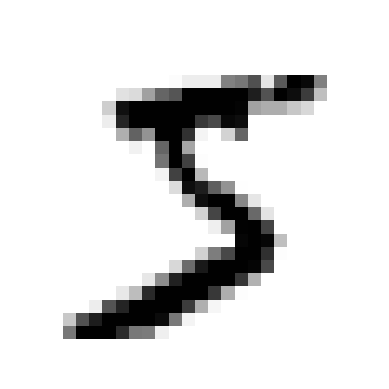

In [3]:
import matplotlib.pyplot as plt
some_digit = X_train[0]
plt.imshow(some_digit, cmap = "binary")
plt.axis("off")
plt.show()

In [4]:
y_train[0]

5

In [5]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [6]:
from sklearn.linear_model import SGDClassifier

X_train, X_test = X_train.reshape((-1, 784)), X_test.reshape((-1, 784))
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([X_train[0], X_train[1]])

array([ True, False])

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [8]:
import numpy as np

num_fives = np.sum(y_train_5) + np.sum(y_test_5)
percentage_fives = (num_fives / (len(y_train_5)+len(y_test_5))) * 100

print(f"Percentage of 5s in the data set: {percentage_fives:.2f}%")

Percentage of 5s in the data set: 9.02%


In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [11]:
from sklearn.metrics import precision_score, recall_score

#precision: TP / (FP + TP)
#cm[1, 1] / (cm[0, 1] + cm[1, 1])
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [12]:
sgd_clf.decision_function([X_train[0]])

array([2164.22030239])

In [13]:
d_score = sgd_clf.decision_function([X_train[0]])
threshold = 0
#threshold = 3000
y_some_digit_pred = (d_score > threshold)
print(y_some_digit_pred)

[ True]


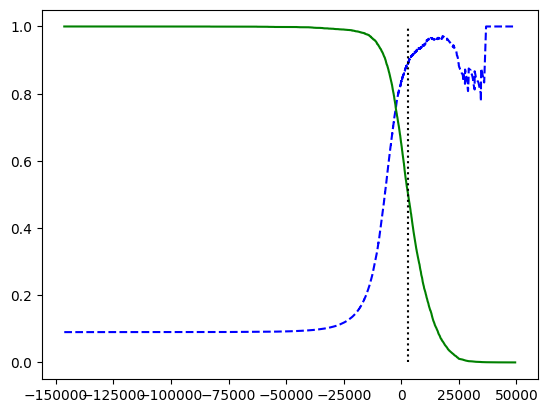

In [14]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
threshold = 3000
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")

In [15]:
idx_for_95_precision = np.argmax(precisions >= 0.95)
threshold_95_precision = thresholds[idx_for_95_precision]
print(threshold_95_precision)

10480.508645329961


In [19]:
print(recalls[idx_for_95_precision])

0.20826415790444566
